In [35]:
!python --version

Python 3.7.6


In [36]:
a = b'h\x65llo'
print(list(a))
print(a)

[104, 101, 108, 108, 111]
b'hello'


In [37]:
a = "a\u0300 propos"
print(list(a))
print(a)

['a', '̀', ' ', 'p', 'r', 'o', 'p', 'o', 's']
à propos


In [38]:
b = []
if not b:
    print("b is empty")

b is empty


In [39]:
b = [1]
if b:
    print("b is not empty")
else:
    print("b is empty")

b is not empty


In [40]:
from typing import Union

def to_str(bytes_or_str: Union[str, bytes]) -> str:
    if isinstance(bytes_or_str, bytes):
        value = bytes_or_str.decode("utf-8")
    else:
        value = bytes_or_str
    return value

print(repr(to_str(b"foo")))
print(repr(to_str("bar")))

'foo'
'bar'


In [41]:
def to_bytes(bytes_or_str: Union[str, bytes]) -> bytes:
    if isinstance(bytes_or_str, str):
        value = bytes_or_str.encode("utf-8")
    else:
        value = bytes_or_str

print(repr(to_bytes(b"foo")))
print(repr(to_bytes("bar")))

None
None


In [42]:
print(b"one"+b"two")

b'onetwo'


In [43]:
print("one"+"two")

onetwo


In [44]:
b"one"+"two"

TypeError: can't concat str to bytes

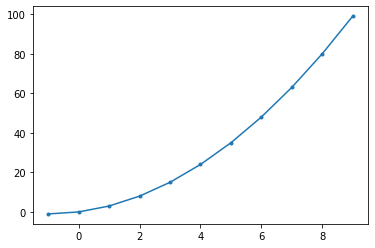

In [45]:
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

def f(x):
    return x**2 + 2*x

x = np.arange(-1,10)
y = [f(i) for i in x]

fig = plt.figure()
plt.plot(x, y, ".-")
plt.show()


In [46]:
assert b"red" > b"blue"
assert "red" > "blue"

In [47]:
assert b"red" > "red"

TypeError: '>' not supported between instances of 'bytes' and 'str'

In [48]:
assert "red" > b"blue"

TypeError: '>' not supported between instances of 'str' and 'bytes'

In [49]:
print(b"foo" == "foo")

False


In [50]:
print(b"red %s" % b"blue")

b'red blue'


In [51]:
print("red %s" % "blue")

red blue


In [52]:
print(b"red %s" % "blue")

TypeError: %b requires a bytes-like object, or an object that implements __bytes__, not 'str'

In [53]:
with open("random.bin", "wb") as f:
    f.write(b"\xf1\xf2\xf3\xf4\xf5")

In [54]:
with open("random.bin", "rb") as f:
    data = f.read()

In [55]:
data

b'\xf1\xf2\xf3\xf4\xf5'

In [56]:
with open("random.bin", "r") as f:
    data = f.read()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf1 in position 0: invalid continuation byte

In [57]:
assert data == b"\xf1\xf2\xf3\xf4\xf5"

In [58]:
a = 0b10111011
b = 0xc5f
print("Binary is %d, hex is %d" % (a, b))

Binary is 187, hex is 3167


In [59]:
key = "my_var"
value = 1.234
formatted = "%-10s = %.2f" % (key, value)
print(formatted)


my_var     = 1.23


In [60]:
reordered_string = "%-10s = %.2f" % (value, key)

TypeError: must be real number, not str

In [61]:
reordered_string = "%.2f = %-10s" % (key, value)

TypeError: must be real number, not str

In [62]:
key = "my_var"
value = 1.234

old_way = "%-10s = %.2f" % (key, value)

new_way = "%(key)-10s = %(value).2f" % {
    "key": key, "value": value
}

reordered = "%(key)-10s = %(value).2f" % {
    "value": value, "key": key
}

assert old_way == new_way == reordered

In [63]:
# 要はフォーマット文字列が見やすいし、キャストの問題も解決してくれるからこれ使えってこと。

key = "my_var"
value = 1.234

formatted = f"{key} = {value}"
print(formatted)

my_var = 1.234


In [64]:
formatted = f"{key!r:<10} = {value:.2f}"
print(formatted)

'my_var'   = 1.23


## 複雑な式の代わりにヘルパー関数を書く

In [65]:
from urllib.parse import parse_qs

In [66]:
my_values = parse_qs("red=5&blue=0&green=",
                    keep_blank_values=True)
print(repr(my_values))

{'red': ['5'], 'blue': ['0'], 'green': ['']}


In [67]:
print("red:", my_values.get("red"))
print("green:", my_values.get("green"))
print("Opacity:", my_values.get("opacity"))

red: ['5']
green: ['']
Opacity: None


In [68]:
red = my_values.get("red", [""])[0] or 0
print(f"red :   {red!r}")

red :   '5'


In [69]:
# hard to see
red = int(my_values.get("red", [""])[0] or 0)
print(red)

5


In [70]:
from typing import List
# So, by using ternary operator, it is easy to see
red_str: List[str] = my_values.get("red", [""])
red = int(red_str[0]) if red_str[0] else 0
print(red)

5


In [71]:
green_str = my_values.get("green", [""])
if green_str[0]:
    green = int(green_str[0])
else:
    green = 0
    
print(green)

0


In [72]:
from typing import Dict
# if you used the logic like this, you must use helper funciton
def get_first_int(values: Dict[str, List[str]], key: str, default: int=0):
    found = values.get(key, [""])
    if found[0]:
        return int(found[0])
    else:
        return default
    
# this is more clear than others. (using "or", using Ternary Operator) 
green = get_first_int(my_values, "green")

print(green)

# the profit made by readabilty　is more than  the one made by code is simple
# you should keep DRY on mind 

0


## インデックスではなく複数代入アンパックを使う。

In [73]:
snack_calories = {
    "chips" : 140,
    "popcorn" : 80,
    "nuts" : 190,
}

items = tuple(snack_calories.items())
print(items)

(('chips', 140), ('popcorn', 80), ('nuts', 190))


In [74]:
item = ("Peanut butter", "Jelly")
first = item[0]
second = item[1]

print(first, "and", second)

Peanut butter and Jelly


In [75]:
first, second = item # unpack
print(first, "and", second)

Peanut butter and Jelly


In [76]:
favorite_snacks = {
    "salty": ("pretzels", 100),
    "sweet": ("cookies", 180),
    "veggie": ("carrotes", 20),
}

((type1, (name1, cals1)),
 (type2, (name2, cals2)),
 (type3, (name3, cals3))) = favorite_snacks.items()

print(f"favarite {type1} is {name1} with {cals1} calories")
print(f"favarite {type2} is {name2} with {cals2} calories")
print(f"favarite {type3} is {name3} with {cals3} calories")

favarite salty is pretzels with 100 calories
favarite sweet is cookies with 180 calories
favarite veggie is carrotes with 20 calories


In [77]:
from typing import List, Union
# bubble sort
def bubble_sort(a: List[Union[str, float]]):
    for _ in range(1, len(a)):
        for i in range(1, len(a)):
            if a[i] < a[i-1]:
                tmp = a[i]
                a[i] = a[i-1]
                a[i-1] = tmp
                
                
names = ["pretzels", "carrots", "arugula", "bacon"]
bubble_sort(names)
print(names)

['arugula', 'bacon', 'carrots', 'pretzels']


In [78]:
nums = [ 1, 2, 5, 11, 7, 8, 8, 10]
bubble_sort(nums)
print(nums)

[1, 2, 5, 7, 8, 8, 10, 11]


In [79]:
def bubble_sort2(a: List[int], i: int)-> List[int]:
    if a[i] < a[i-1]:
        tmp = a[i]
        a[i] = a[i-1]
        a[i-1] = tmp
        return a
    else:
        return a

In [80]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline

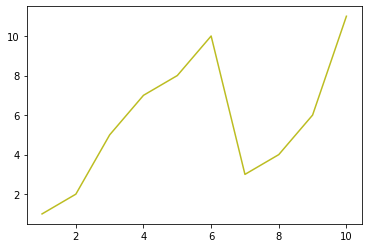

In [81]:

nums = [ 1, 2, 5, 11, 7, 8, 10, 3, 4, 6]

ims = []

fig = plt.figure()
for i in range(1, len(nums)):
    a = bubble_sort2(nums, i)
    x = np.arange(1, len(a)+1)
    im = plt.plot(x, np.array(a))
    ims.append(im)
    
ani = animation.ArtistAnimation(fig, ims, interval=500)
HTML(ani.to_jshtml())

In [82]:
nums

[1, 2, 5, 7, 8, 10, 3, 4, 6, 11]

In [83]:
def bubble_sort3(a: List[Union[str, float]]):
    for _ in range(1, len(a)):
        for i in range(1, len(a)):
            if a[i] < a[i-1]:
                # swap
                a[i-1], a[i] = a[i], a[i-1]
                
names = ["pretzels", "carrots", "arugula", "bacon"]
bubble_sort3(names)
print(names)

['arugula', 'bacon', 'carrots', 'pretzels']


In [84]:
snacks = [
    ("bacon", 350),
    ("donut", 240),
    ("muffin", 190),
]

for i in range(len(snacks)):
    item = snacks[i]
    name = item[0]
    calories = item[1]
    print(f"#{i+1}: {name} has {calories} calories")

#1: bacon has 350 calories
#2: donut has 240 calories
#3: muffin has 190 calories


In [85]:
for rank, (name, calories) in enumerate(snacks, 1):
    print(f"#{rank}: {name} has {calories} calories")

#1: bacon has 350 calories
#2: donut has 240 calories
#3: muffin has 190 calories


## rangeではなくenumerateを使う

In [86]:
from random import randint

random_bits = 0
for i in range(64):
    if randint(0, 1):
        random_bits |= 1 << i
        
print(bin(random_bits))
print(random_bits)

0b110010001111110101111001110110111011010011111111110111110111011
7241432980617424827


In [87]:
a = 1

a |= 2

print(a)

3


In [88]:
# |= inplcace OR operator
# here, toward bit set 
a = 3
print(bin(a))
a |= 1
print(bin(1))
print(bin(a))
print(a)

a = 2
print(bin(a))
a |= 5
print(bin(5))
print(bin(a))
print(a)

0b11
0b1
0b11
3
0b10
0b101
0b111
7


In [89]:
flavor_list = ["valila", "chocolate", "pecan", "strawberry"]

In [90]:
it = enumerate(flavor_list)
print(next(it))
print(next(it))

(0, 'valila')
(1, 'chocolate')


In [91]:
for i, flavor in enumerate(flavor_list):
    print(f"{i+1}: {flavor}")

1: valila
2: chocolate
3: pecan
4: strawberry


In [92]:
# specify the start num
for i, flavor in enumerate(flavor_list, 1):
    print(f"{i}: {flavor}")

1: valila
2: chocolate
3: pecan
4: strawberry


## イテレータを並列に処理するにはzipを使う

In [93]:
names = ["Cacilia", "Lise", "Marie"]
counts = [len(n) for n in names]

print(counts)

[7, 4, 5]


In [94]:
longest_name = None
max_count = 0

for i in range(len(names)):
    count = counts[i]
    if count > max_count:
        longest_name = names[i]
        max_count = count
        
print(longest_name)

Cacilia


In [95]:
longest_name = None
max_count = 0

for i, name in enumerate(names):
    count = counts[i]
    if count > max_count:
        longest_name = name
        max_count = count

print(longest_name)

Cacilia


In [96]:
longest_name = None
max_count = 0

for name, count in zip(names, counts):
    if count > max_count:
        longest_name = name
        max_count = count

print(longest_name)

Cacilia


In [97]:
from itertools import zip_longest

names.append("Rosalind")

for name, count in zip_longest(names, counts):
    print(f"{name}: {count}")

Cacilia: 7
Lise: 4
Marie: 5
Rosalind: None


## forループとwhileループのあとのelseブロックは使わない

In [98]:
for i in range(3):
    print("Loop", i)
else:
    print("else block!")

Loop 0
Loop 1
Loop 2
else block!


In [99]:
for i in range(3):
    print("Loop", i)
    if i == 2:
        break
else:
    print("else block!")

Loop 0
Loop 1
Loop 2


In [100]:
for x in []:
    print("Never runs")
else:
    print("For Else block!")

For Else block!


In [101]:
while False:
    print("Never runs")
else:
    print("While Else block!")


While Else block!


In [102]:
a = 4
b = 9

for i in range(2, min(a, b) + 1):
    print("Testing", i)
    if a % i == 0 and b % i == 0:
        print("Not coprime")
        break
else:
    print("Coprime")

Testing 2
Testing 3
Testing 4
Coprime


In [103]:
def coprime(a: int, b: int)->bool:
    for i in range(2, min(a, b)+1):
        if a % i == 0 and b % i == 0:
            return False
    return True

assert coprime(4, 9)
assert not coprime(3, 6)

In [104]:
def coprime2(a: int, b: int)->bool:
    is_coprime = True
    for i in range(2, min(a, b) + 1):
        if a % i == 0 and b % i == 0:
            is_coprime = False
            break
    return is_coprime

assert coprime2(4, 9)
assert not coprime2(3, 6)

## 代入式で繰り返しを防ぐ

In [105]:
a = ["a", "b", "c", "d", "e", "f", "g", "h"]

print(a[3:5])
print(a[1:7])

['d', 'e']
['b', 'c', 'd', 'e', 'f', 'g']


In [106]:
assert a[:5] == a[0:5]

In [107]:
assert a[5:] == a[5:len(a)]

In [108]:
a[:]

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']

In [109]:
a[:5]

['a', 'b', 'c', 'd', 'e']

In [110]:
a[:-1]

['a', 'b', 'c', 'd', 'e', 'f', 'g']

In [111]:
a[4:]

['e', 'f', 'g', 'h']

In [112]:
a[-3:]

['f', 'g', 'h']

In [113]:
a[2:5]

['c', 'd', 'e']

In [114]:
a[2:-1]

['c', 'd', 'e', 'f', 'g']

In [115]:
a[-3:-1]

['f', 'g']

In [116]:
b = a[3:]
print(b)
b[1] = 99

['d', 'e', 'f', 'g', 'h']


In [117]:
print(b)

['d', 99, 'f', 'g', 'h']


In [118]:
print(a)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']


In [119]:
a[2:7] = [99, 22, 14]
print(a)

['a', 'b', 99, 22, 14, 'h']


In [120]:
b = a[:]
assert b == a and b is not a

In [121]:
b = a
print(a)
print(b)

['a', 'b', 99, 22, 14, 'h']
['a', 'b', 99, 22, 14, 'h']


In [122]:
a[:] = [101, 102, 103]
assert a is b

## １つの式ではストライドとスライスを同時に使わない

In [123]:
x = ["red", "orange", "yellow", "green", "blue", "purple"]
odds = x[::2]
evens = x[1::2]
print(odds)
print(evens)

['red', 'yellow', 'blue']
['orange', 'green', 'purple']


In [124]:
x = b"mongoose"
y = x[::-1]

print(y)

b'esoognom'


In [125]:
x = "寿司"
y = x[::-1]
print(y)

司寿


In [126]:
w = "寿司"
x = w.encode("utf-8")
y = x[::-1]
z = y.decode("utf-8")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb8 in position 0: invalid start byte

In [127]:
# itertools.islice

## スライスではなくCatch-allアンパックを使う

In [128]:
car_ages = [0, 9, 4, 8, 7, 20, 19, 1, 6, 15]
car_ages_descending = sorted(car_ages, reverse=True)
oldest, second_oldest, *others = car_ages_descending

In [129]:
print(oldest, second_oldest, others)

20 19 [15, 9, 8, 7, 6, 4, 1, 0]


## key 引数を使い複雑な基準でソートする

In [130]:
numbers = [93, 86, 68, 70]
numbers.sort()
print(numbers)

[68, 70, 86, 93]


In [135]:
class Tool:
    def __init__(self, name: str, weight: int):
        self.name = name
        self.weight = weight
    
    def __repr__(self):
        return f"Tool({self.name!r}, {self.weight})"
    
    
tools = [
    Tool("level", 3.5),
    Tool("hammer", 1.25),
    Tool("screwdriver", 0.5),
    Tool("chisel", 0.25)
]

In [136]:
tools.sort()

TypeError: '<' not supported between instances of 'Tool' and 'Tool'

In [138]:
print("Unsortd", repr(tools))
tools.sort(key=lambda x: x.name)
print("\nSored: ", tools)

Unsortd [Tool('chisel', 0.25), Tool('hammer', 1.25), Tool('level', 3.5), Tool('screwdriver', 0.5)]

Sored:  [Tool('chisel', 0.25), Tool('hammer', 1.25), Tool('level', 3.5), Tool('screwdriver', 0.5)]


In [139]:
tools.sort(key=lambda x: x.weight)
print("By weight: ", tools)

By weight:  [Tool('chisel', 0.25), Tool('screwdriver', 0.5), Tool('hammer', 1.25), Tool('level', 3.5)]


## 辞書の欠損キーの処理にはinやKeyErrorではなくgetを使う

In [142]:
votes = {
    "baguette": ["Bob", "Alice"],
    "ciabatta": ["Coco", "Deb"]
}

key = "brioche"
who = "Elimer"

names = votes.get("key")
if names is None:
    votes[key] = names = []

names.append(who)

In [143]:
names

['Elimer']

In [145]:
from collections import defaultdict

class Visits:
    def __init__(self):
        self.data = defaultdict(set)
    
    def add(self, country, city):
        self.data[country].add(city)

In [146]:
visits = Visits()

visits.add("England", "Bath")
visits.add("England", "London")

print(visits.data)

defaultdict(<class 'set'>, {'England': {'Bath', 'London'}})


In [147]:
# ファイルシステムにあるソーシャルネットワークプロフィールの写真を管理するプログラムを書いてるとする。
pictures = {}

path = "profile_1234.png"

handle = pictures.get(path)
if handle is None:
    try:
        handle = open(path, "a+b")
    except OSError:
        print(f"Failed to open path {path}")
        raise
    else:
        pictures[path] = handle
    
    
handle.seek(0)
image_data = handle.read()

In [149]:
try:
    handle = pictures.setdefault(path, open(path, "a+b"))
except OSError:
    print(f"Failed to open path {path}")
    raise

else:
    handle.seek(0)
    image_data = handle.read()
    


In [150]:
from collections import defaultdict

def open_picture(profile_path: str):
    try:
        return open(profile_path, "a+b")
    except OSError:
        print(f"Failed to open path {profile_path}")
        raise

# defaultdict はコンストラクタに渡される関数には引数がないと仮定してる
pictures = defaultdict(open_picture)
handle = pictures[path]
handle.seek(0)
image_data = handle.read()

TypeError: open_picture() missing 1 required positional argument: 'profile_path'

In [152]:
# 欠損キーを扱うロジック
# Dict型を継承して、新しいメソッドを付け足す
class Pictures(dict):
    def __missing__(self, key: str):
        value = open_picture(key)
        self[key] = value
        return value
    
pictures = Pictures()
handle = pictures[path] # ここでキーのpathがなければ上で定義した__missing__が呼ばれる
handle.seek(0)
image_data = handle.read()

In [154]:
image_data

b''